## First of all, lets download our data files and see whats is inside them.

In [2]:
import numpy as np # linear algebra library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) library
import os
import gc
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 2
%matplotlib inline
modules_path = os.path.abspath("modules")
if modules_path not in sys.path:
    sys.path.append(modules_path)
from helper_functions import HelperFunctions # type: ignore

pal = sns.color_palette()

print('File sizes')
for f in os.listdir('csv'):
  print(f.ljust(30) + ' ' + str(round(os.path.getsize('csv/' + f) / 1000000, 2)) + ' MB')
  
df_train = pd.read_csv('csv/quora_question_pairs_train.csv.zip')
df_test = pd.read_csv('csv/quora_question_pairs_test.csv.zip')


File sizes
quora_question_pairs_train.csv.zip 18.41 MB
quora_question_pairs_test.csv.zip 4.6 MB


#### As we can see, train data is larger than test data.
#### Thus we can assume, that test dataset is smaller than train one.

## Let's see what columns we have in our train dataset.

In [2]:
df_train = pd.read_csv('csv/quora_question_pairs_train.csv.zip')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,332278,459256,459257,The Iliad and the Odyssey in the Greek culture?,How do I prove that the pairs of three indepen...,0
1,196656,297402,297403,What is practical management and what is strat...,What are the practical aspects of strategic ma...,0
2,113125,184949,184950,How useful is MakeUseOf Answers?,Is there any Q&A site that is not Yahoo answer...,0
3,266232,101283,163744,Which is the best place to reside in India and...,Which ia the best place to visit in India?,0
4,122738,17811,27517,Why do so many people ask questions on Quora t...,Why don't many people posting questions on Quo...,1


In [3]:
df_train.shape

(323432, 6)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323432 entries, 0 to 323431
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            323432 non-null  int64 
 1   qid1          323432 non-null  int64 
 2   qid2          323432 non-null  int64 
 3   question1     323431 non-null  object
 4   question2     323430 non-null  object
 5   is_duplicate  323432 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.8+ MB


Total number of question pairs for train: 323432
Duplicate pairs: 36.92%
Total number of questions in train data: 449792
Number of questions which appear multiple times: 85897


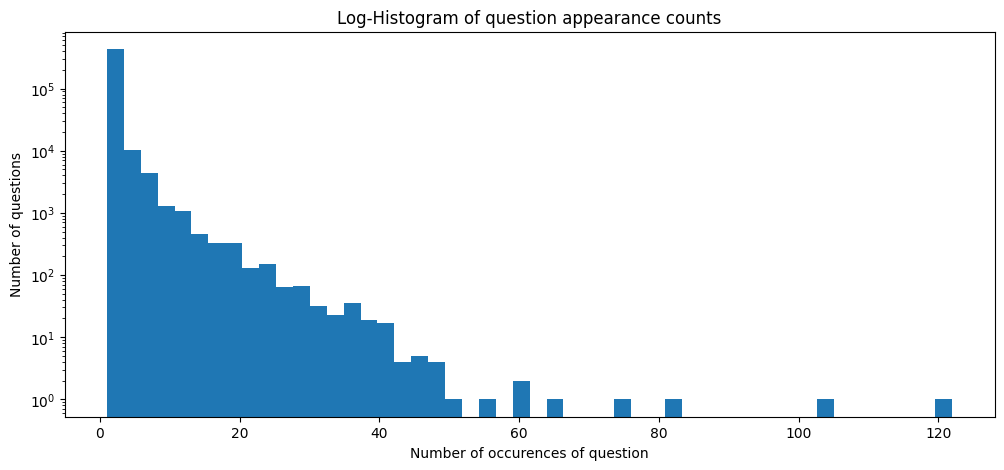

In [5]:
HelperFunctions.identify_duplicate_questions(df_train, 'train')

#### As we can see there are almost 37% of duplicate pairs in train data.
#### Most of questions appear only multiple times and very few questions appear several times (and a few questions appearing many times). There are several outliers - 100 and 120 times for one question.

## Now lets make text analysis

mean-train: 59.83 std-train: 31.97 max-train: 1169 mean-test: 59.80 std-test: 31.94 max-test: 1169


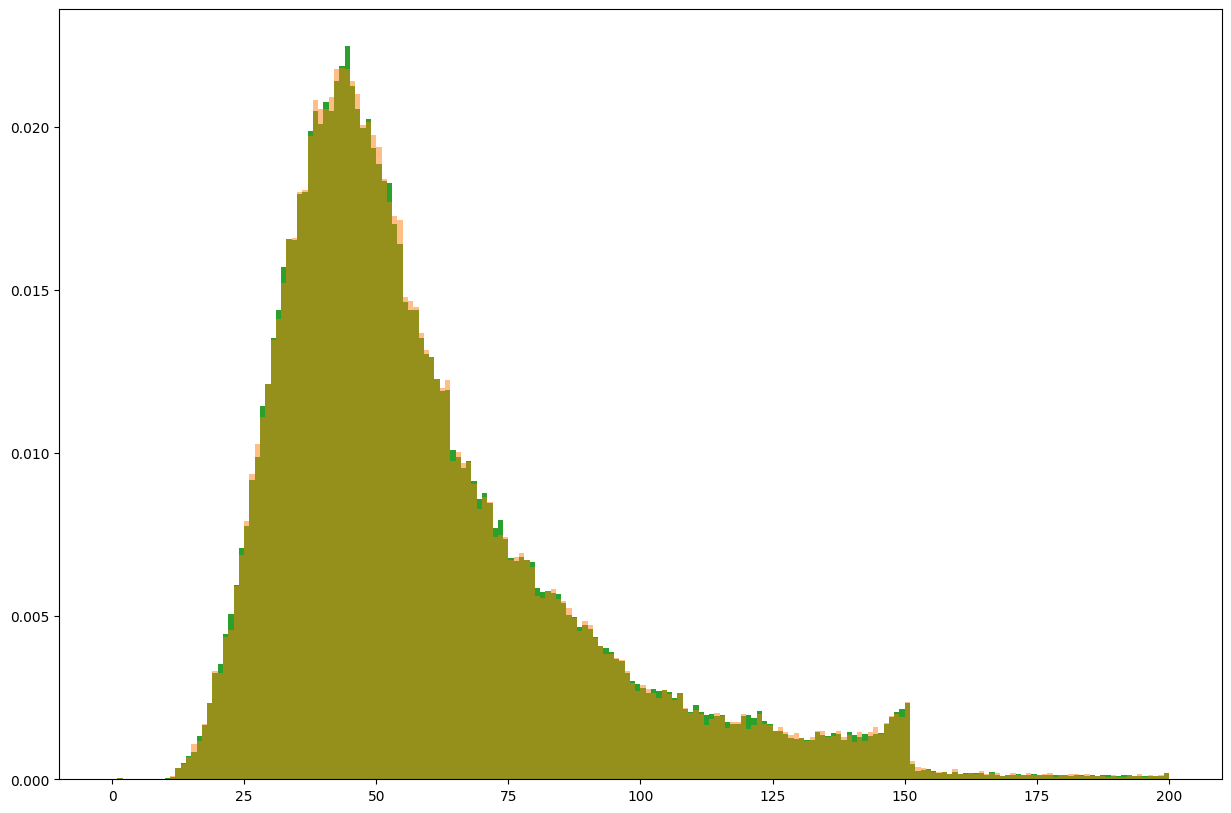

In [2]:
train_qs, test_qs = HelperFunctions.text_analysis(df_train, df_test, pal)

#### We can see that all questions are somewhere between 15 and 150 word and there is a steep cut after 150 characters.
#### Also this histogram was cut at 200 characters because questions more that 200 chars long are very rare.

 mean-train 11.065758799376685 std-train 5.891249720172947 mean-test 11.061243167033565 std-test 5.880848807437454 max-train 237 max-test 237


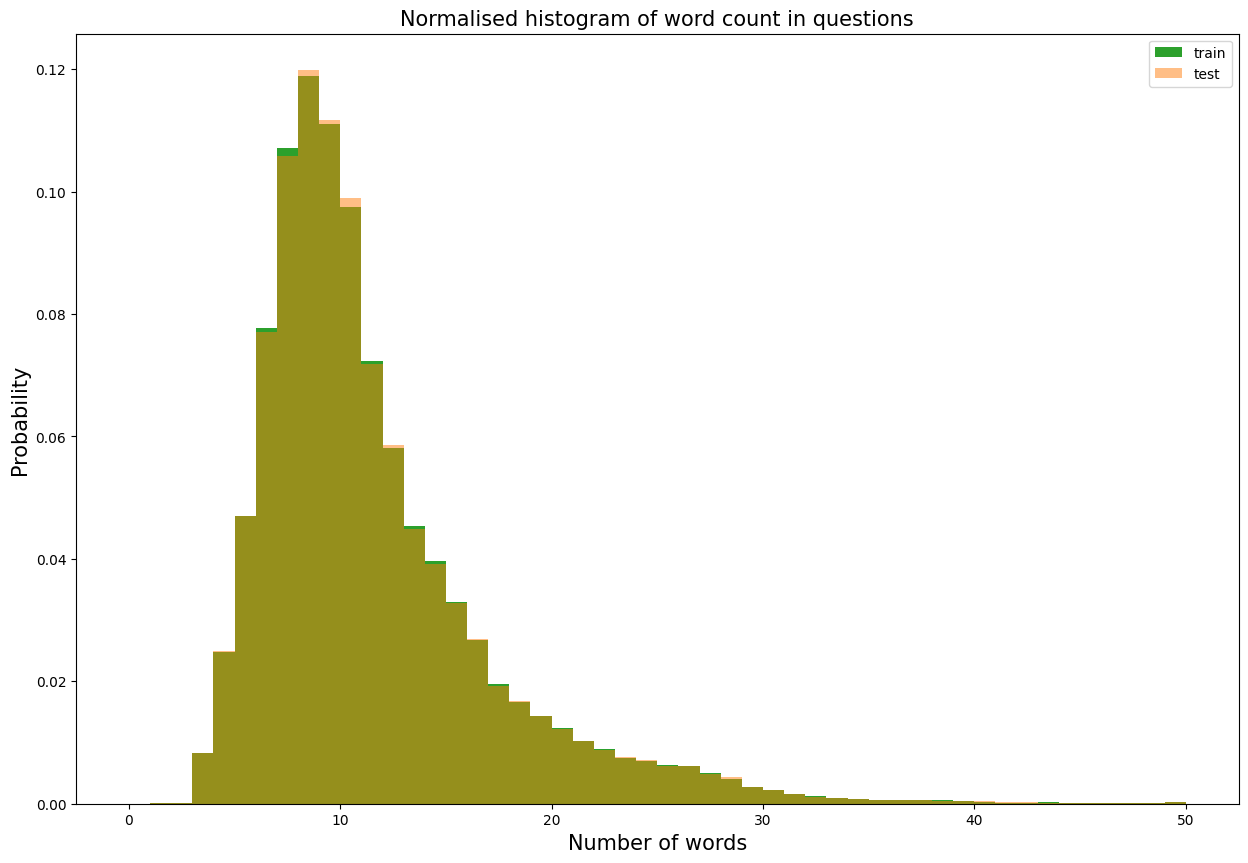

In [7]:
HelperFunctions.word_count(train_qs, test_qs, pal)

#### As for word count, the most popular number is 10.

## Now lets see what are mos popular words in our dataset.

(np.float64(-0.5), np.float64(1439.5), np.float64(1079.5), np.float64(-0.5))

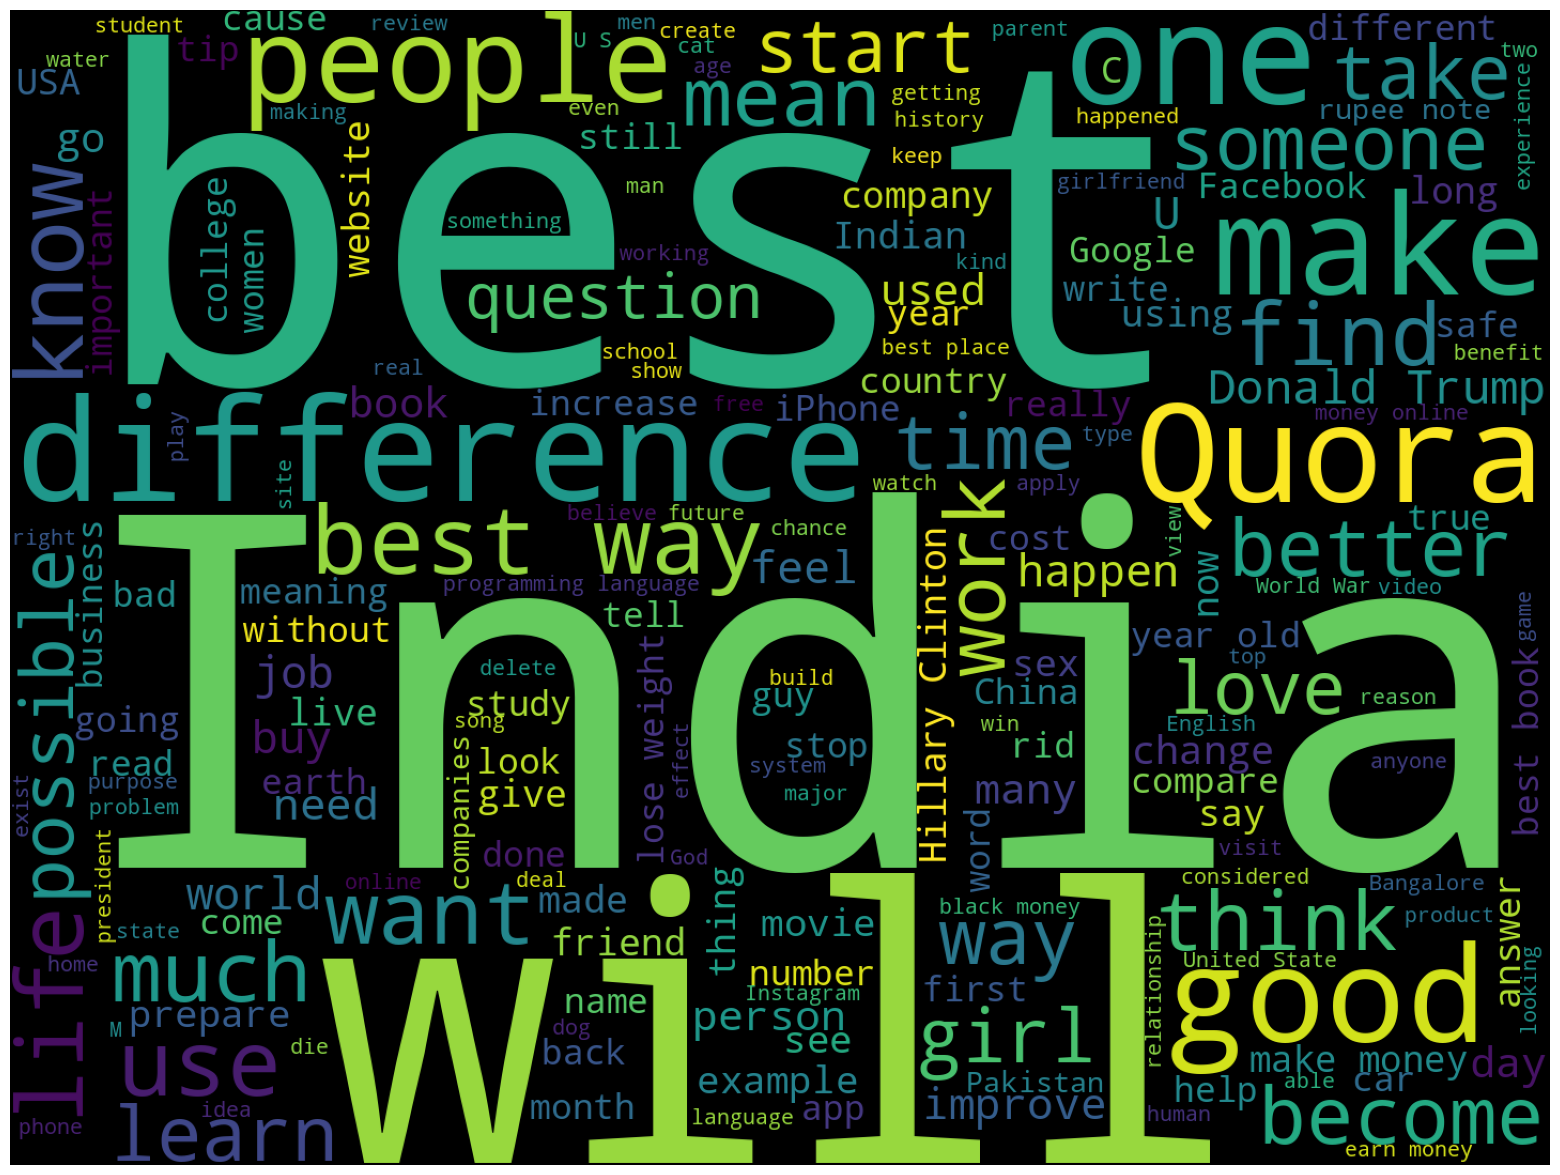

In [8]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

### Lets make semantic analysis of our dataset

#### We'll analyze punctuation in questions. This may help with feature engineering later.

In [5]:
HelperFunctions.semantic_analysis(train_qs)

Questions with question marks: 99.88%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 0.02%
Questions with capital letters:  99.95%
Questions with numbers: 11.85%


### Also lets make feature analysis in order to find out how powerful are some features

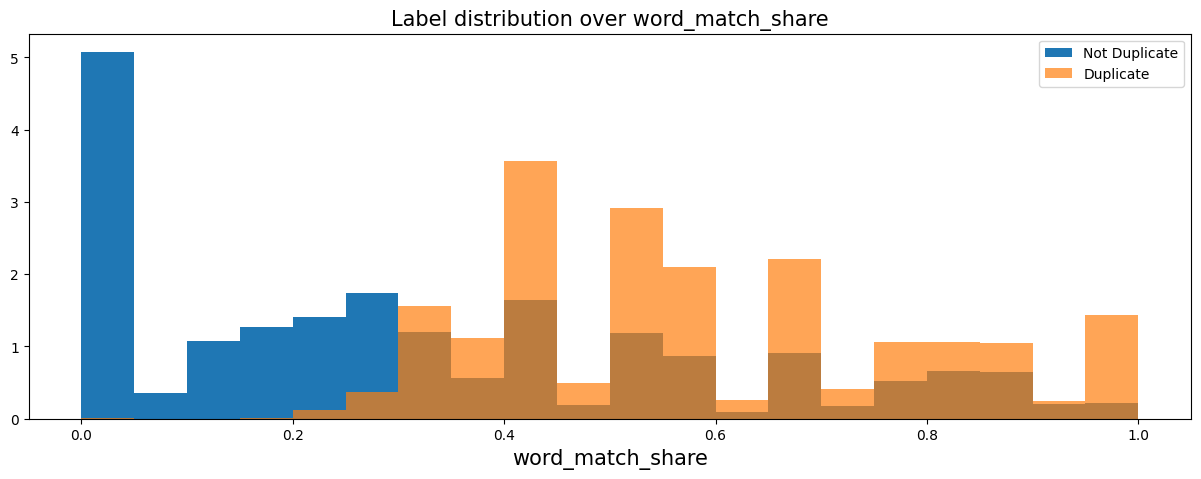

In [7]:
HelperFunctions.feature_analysis(df_train)

#### Here we can see that this feature `word_match_share` has quite a lot of predictive power, as it is good at separating the duplicate questions from the non-duplicate ones.
#### Interestingly, it seems very good at identifying questions which are definitely different, but is not so great at finding questions which are definitely duplicates.